In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading and splitting dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


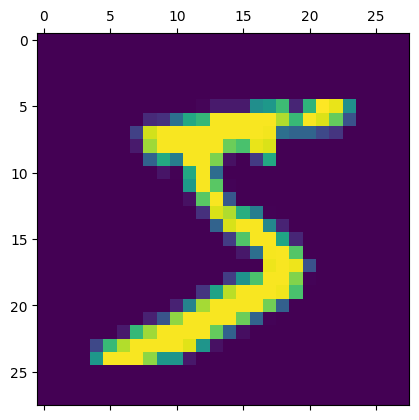

In [ ]:
plt.matshow(x_train[0])

In [ ]:
#scaling
x_train = x_train/255
x_text = x_test/255

In [ ]:
#flattening dataset
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_text.reshape(len(x_test),28*28)

In [ ]:
x_test_flattened.shape

(10000, 784)

In [ ]:
#creating model
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

#compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#fitting
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4714 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9257


In [ ]:
#model evaluation
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9254


[0.2712981104850769, 0.9254000186920166]

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted

313/313 [==============================] - 1s 5ms/step


array([[2.69143023e-02, 2.49706119e-07, 4.83372882e-02, ...,
        9.99764860e-01, 7.55566806e-02, 5.77005982e-01],
       [4.37902778e-01, 9.18097701e-03, 9.99121010e-01, ...,
        6.49141494e-13, 2.33924702e-01, 2.74722334e-09],
       [5.59751992e-04, 9.94277775e-01, 5.76981962e-01, ...,
        1.14662513e-01, 3.82133454e-01, 4.04702798e-02],
       ...,
       [7.23460153e-06, 3.47570153e-06, 8.49878299e-04, ...,
        1.82943061e-01, 5.34109056e-01, 6.75726116e-01],
       [1.32351590e-04, 1.32542409e-04, 8.98942453e-05, ...,
        2.12061332e-05, 6.68262720e-01, 1.19552285e-04],
       [1.02944942e-02, 4.20320334e-10, 1.24652505e-01, ...,
        5.97341288e-09, 3.08739865e-04, 7.39392419e-07]], dtype=float32)

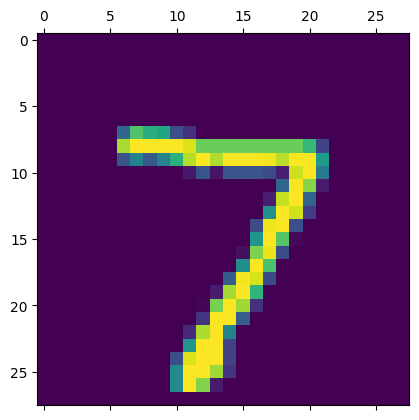

In [ ]:
plt.matshow(x_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels =[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    3,    0,    7,   12,    1,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  913,   19,    8,    6,   16,    9,   43,    4],
       [   3,    0,   14,  921,    1,   28,    4,    7,   26,    6],
       [   1,    1,    2,    2,  909,    0,   19,    3,   11,   34],
       [   7,    2,    2,   21,    6,  798,   19,    3,   28,    6],
       [   7,    3,    3,    1,    6,   10,  927,    0,    1,    0],
       [   1,    7,   22,   10,    9,    1,    0,  939,    5,   34],
       [   8,    6,    5,   20,    8,   37,   13,    8,  863,    6],
       [  11,    7,    1,   12,   27,    9,    0,   17,    7,  918]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'true values')

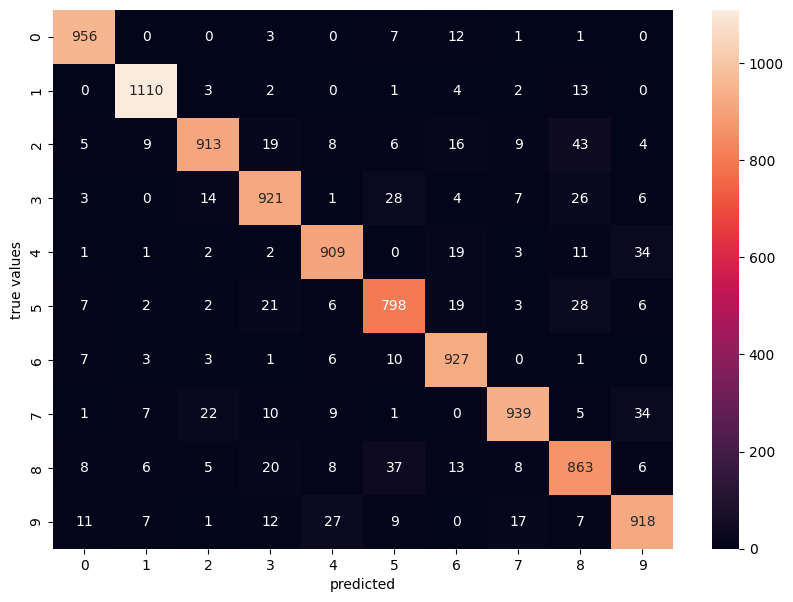

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')

In [ ]:
#inserting hidden layer
model = keras.Sequential([keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2709 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1226 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0867 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0649 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9836


In [ ]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0818 - accuracy: 0.9730


[0.08179441839456558, 0.9729999899864197]

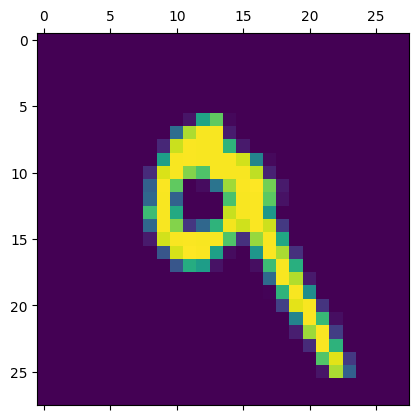

In [ ]:
plt.matshow(x_test[7])

In [ ]:
y_predicted_labels =[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

Text(95.72222222222221, 0.5, 'truth')

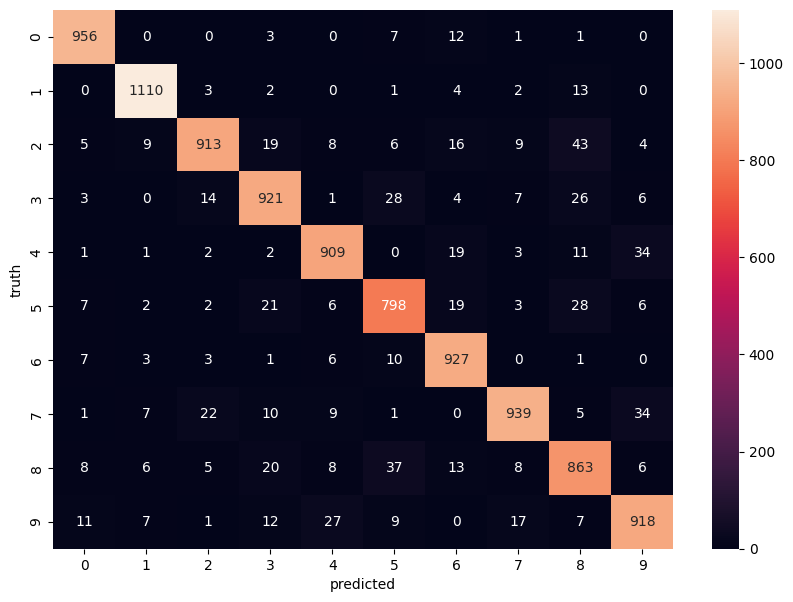

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')